In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import seaborn as ns
from wordcloud import WordCloud

<h1> Read in CSV Data </h1>

In [11]:
dfWords = pd.read_csv("/Users/grantpoulsen/Desktop/Sentiment Data/wordsCleaned")
dfData = pd.read_csv("/Users/grantpoulsen/Desktop/Sentiment Data/bookDataCleaned")
dfWords.drop("Unnamed: 0",1,inplace = True)
dfData.drop('Unnamed: 0',1,inplace = True)

In [12]:
dfWords.head()

,Word,0.5Star,1.0Star,1.5Star,2.0Star,2.5Star,3.0Star,3.5Star,4.0Star,4.5Star,5.0Star,Count,Variance,Mean
0,Five,0,0,0,0,0,0,2,2,0,0,4,0.64,3.750000
1,Strangers,0,0,0,0,0,0,0,1,0,0,1,0.09,4.000000
2,EV,0,0,0,0,0,0,0,1,0,0,1,0.09,4.000000
3,Adamson,0,0,0,0,0,0,0,1,0,0,1,0.09,4.000000
4,psychological,0,0,0,1,0,1,0,5,5,3,15,3.85,4.166667


In [13]:
dfData.head()

,Title,Author,Stars,Format,Pages,Publisher,Publish Date,ISBN,Issue,Category
0,Do I Know You?: A Novel of Suspense,Sarah Strohmeyer,4.5,Trade,352 pages,Harper Paperbacks,30-Nov-2021,9780063091290,February 2022,"Mystery, Crime & Thriller"
1,All of You Every Single One: A Novel,Beatrice Hitchman,4.0,Hard,320 pages,Harry N. Abrams,04-Jan-2022,9781419756931,February 2022,Historical Fiction
2,The Other Computer History,Hans Bodmer,4.5,Hard,168 pages,Books on Demand,04-Mar-2021,9783752672503,February 2022,Biographies & Memoirs
3,Dreck,Alex Grass,4.5,Trade,303 pages,Dickinson Publishing Group,15-Aug-2021,9781735888538,February 2022,Horror
4,Death Came Swiftly: A Novel about the Tay Brid...,William Abrams,4.5,Trade,340 pages,The Sager Group LLC,10-Oct-2021,9781950154623,February 2022,Historical Fiction


<h1> Frequency Plot of Word Connotation </h1>

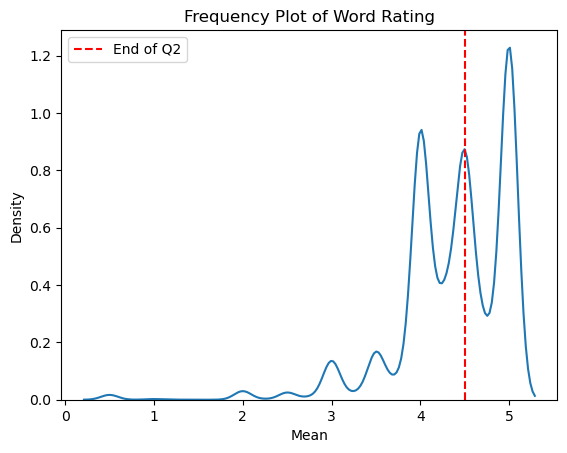

In [14]:
sns.kdeplot(dfWords['Mean'])
plt.axvline(x=dfWords['Mean'].describe().loc['50%'],linestyle = '--', label = 'End of Q2', color = 'red')
plt.legend()
plt.title("Frequency Plot of Word Rating")
plt.show()

<h1> Frequency Plot of Star Rating </h1>

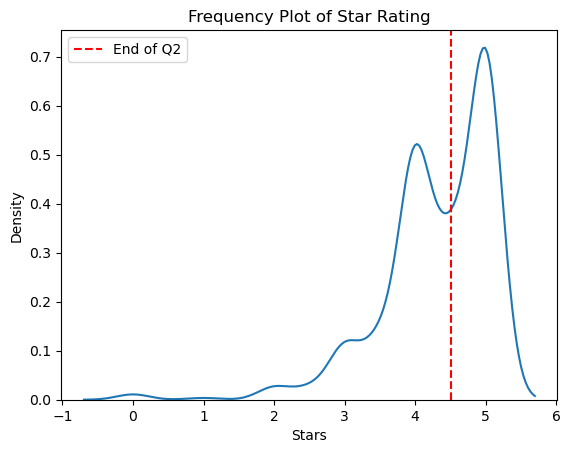

In [15]:
sns.kdeplot(dfData['Stars'])
plt.axvline(x=dfWords['Mean'].describe().loc['50%'],linestyle = '--', label = 'End of Q2', color = 'red')
plt.legend()
plt.title("Frequency Plot of Star Rating")
plt.show()

<h1> Word Cloud: Top 10 Variation in Connotation </h1>

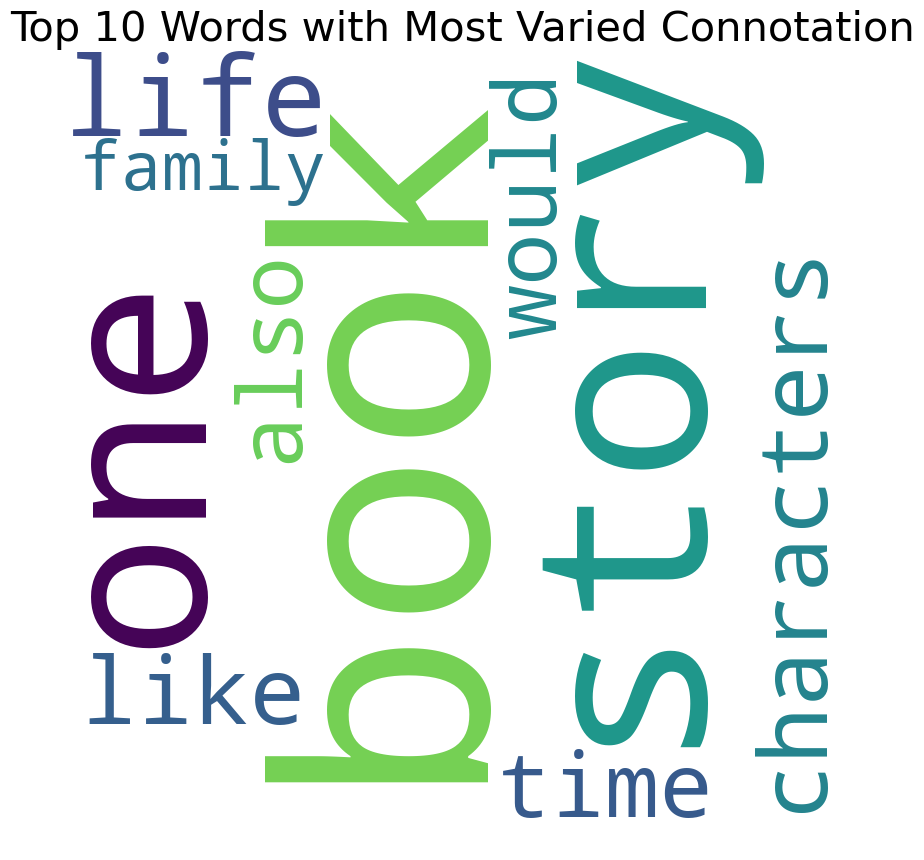

In [16]:

#Lets Only use Heavily reliable data here. 
dfWc = dfWords[dfWords['Count'] >= 75]

#Get top 10
dfWc = dfWc.sort_values(by = ['Variance'],ascending = False, inplace = False)
dfWc.reset_index(inplace = True, drop = True)
dfWc = dfWc.head(10)

#Get data into format wordcloud understands
index = 0
wc = ''

for word in dfWc["Word"]:
    for i in range(dfWc.loc[index,'Count']):
        wc = wc + ' ' + word
    index = index+1

wc = wc.strip()
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False, stopwords = set()).generate(wc)

#Plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top 10 Words with Most Varied Connotation", fontsize = 30)
plt.show()

<h1> Word Cloud: Bottom 10 Variation in Connotation </h1>

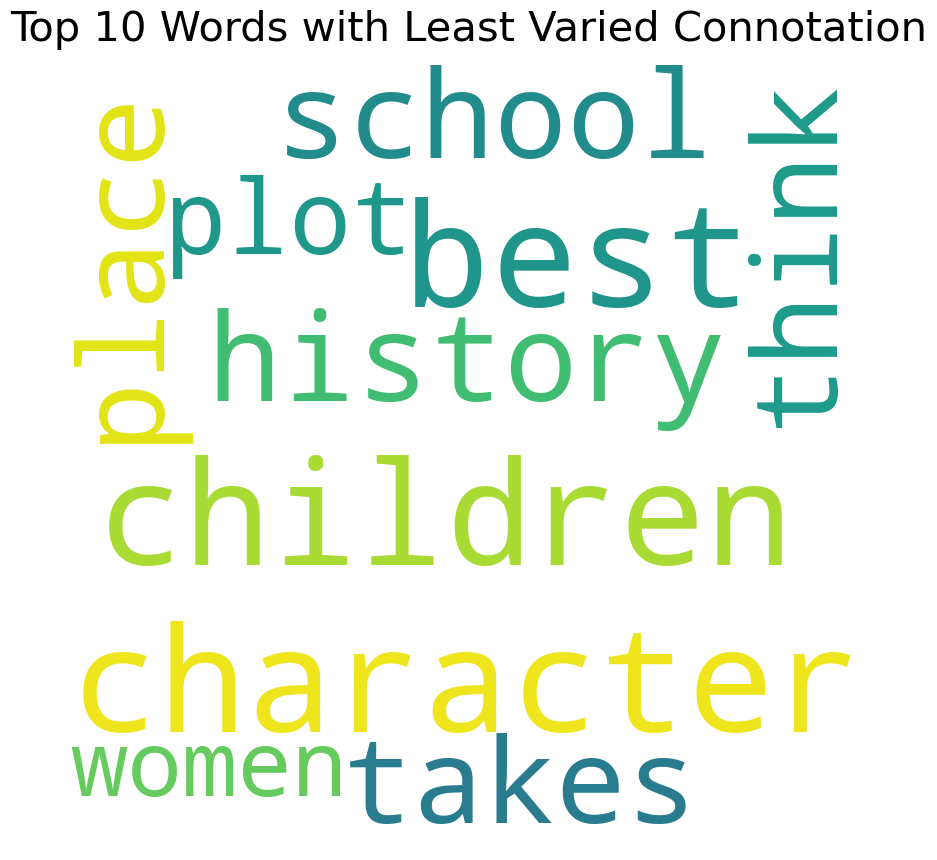

In [17]:

#Lets Only use Heavily reliable data here. 
dfWc = dfWords[dfWords['Count'] >= 75]

#Get top 10
dfWc = dfWc.sort_values(by = ['Variance'],ascending = True, inplace = False)
dfWc.reset_index(inplace = True, drop = True)
dfWc = dfWc.head(10)

#Get data into format wordcloud understands
index = 0
wc = ''

for word in dfWc["Word"]:
    for i in range(dfWc.loc[index,'Count']):
        wc = wc + ' ' + word
    index = index+1

wc = wc.strip()
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False, stopwords = set()).generate(wc)

#Plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top 10 Words with Least Varied Connotation", fontsize = 30)
plt.show()

<h1> Column Chart: Top 10 Variation in Connotation </h1>

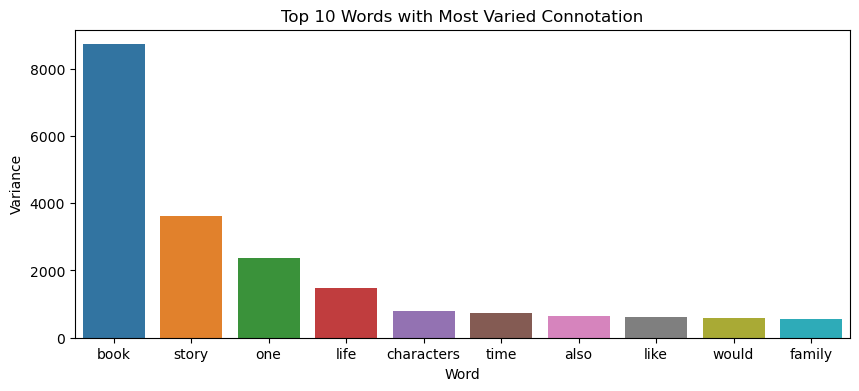

In [18]:
#Make Figure
plt.figure(figsize=(10,4))

#Format data for wordcloud
dfCol = dfWords[dfWords['Count'] >= 75]
dfCol = dfCol.sort_values(by = ['Variance'],ascending = False, inplace = False)
dfCol.reset_index(inplace = True, drop = True)
dfCol = dfCol.head(10)

#Make bar plot
sns.barplot(x = 'Word', y = 'Variance', data = dfCol)
plt.title("Top 10 Words with Most Varied Connotation")
plt.show()

<h1> Column Chart: Bottom 10 Variation in Connotation </h1>

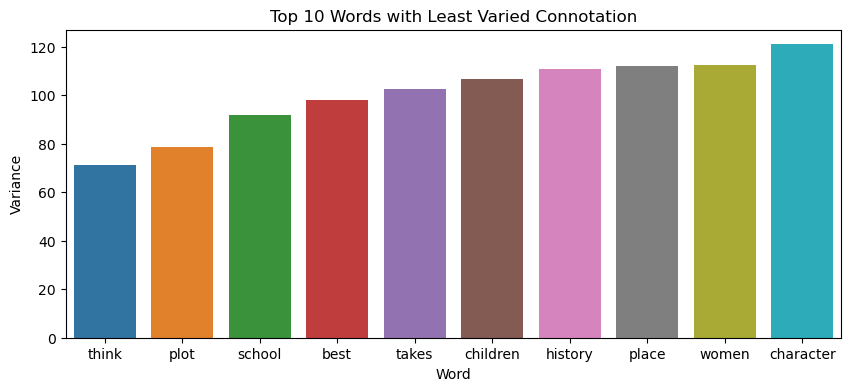

In [19]:
#Make Figure
plt.figure(figsize=(10,4))

#Format data for wordcloud
dfWc = dfWords[dfWords['Count'] >= 75]
dfCol = dfWc.sort_values(by = ['Variance'],ascending = True, inplace = False)
dfCol.reset_index(inplace = True, drop = True)
dfCol = dfCol.head(10)

#Make bar plot
sns.barplot(x = 'Word', y = 'Variance', data = dfCol)
plt.title("Top 10 Words with Least Varied Connotation")
plt.show()

<h1> Word Cloud: Top 10 Most Positive Words </h1>

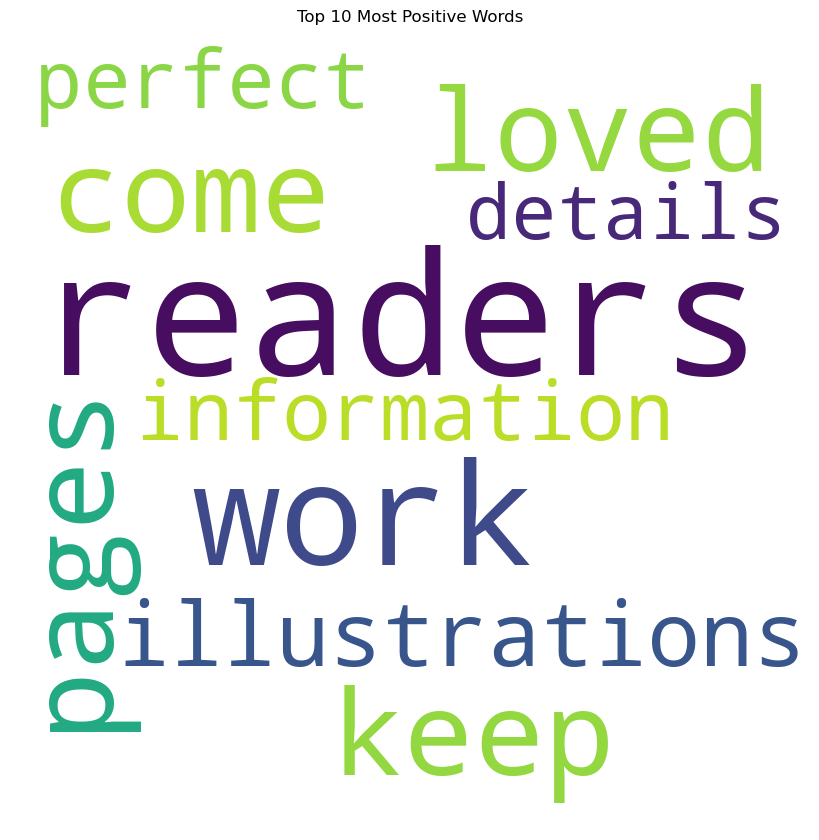

In [21]:
#Filter for significantly reliable data
dfWc = dfWords[dfWords['Count'] >= 50]

#Get Top 10
dfWc = dfWc.sort_values(by = ['Mean'],ascending = False, inplace = False)
dfWc.reset_index(inplace = True, drop = True)
dfWc = dfWc.head(10)


#Format for wordcloud
index = 0
wc = ''

for word in dfWc["Word"]:
    for i in range(dfWc.loc[index,'Count']):
        wc = wc + ' ' + word
    index = index+1

wc = wc.strip()
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False, stopwords = set()).generate(wc)

#Plot 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top 10 Most Positive Words")
plt.show()

<h1> Word Cloud: Top 10 Most Negative Words </h1>

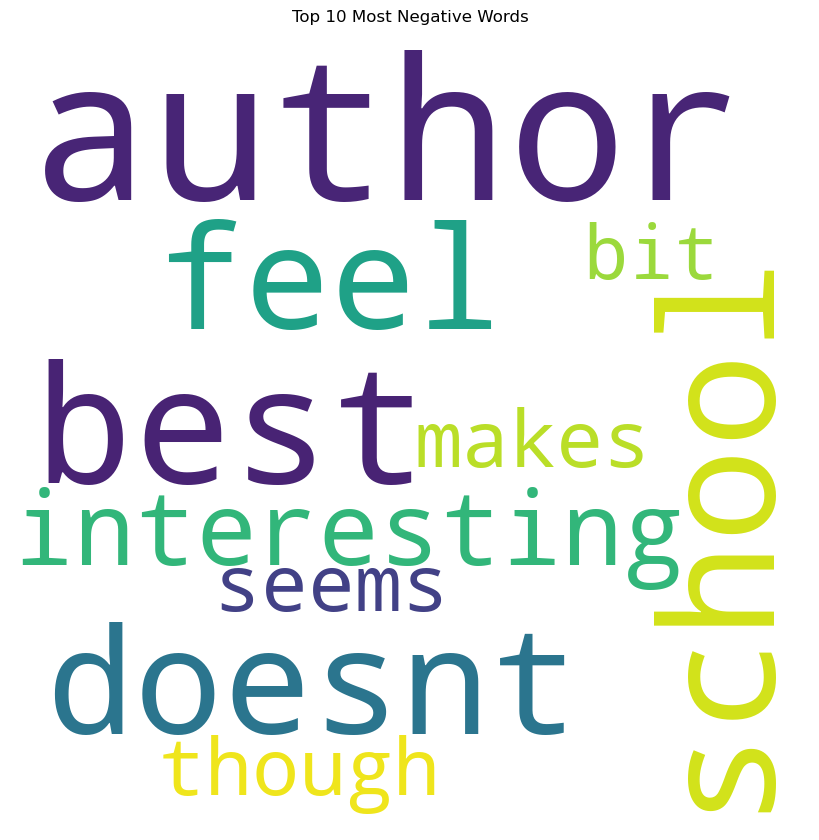

In [29]:
#Filter for significantly reliable data
dfWc = dfWords[dfWords['Count'] >= 50]

#Get Top 10
dfWc = dfWc.sort_values(by = ['Mean'],ascending = True, inplace = False)
dfWc.reset_index(inplace = True, drop = True)
dfWc = dfWc.head(10)

#Format for wordcloud
index = 0
wc = ''

for word in dfWc["Word"]:
    for i in range(dfWc.loc[index,'Count']):
        wc = wc + ' ' + word
    index = index+1

wc = wc.strip()
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False, stopwords = set()).generate(wc)

#Plot 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top 10 Most Negative Words")
plt.show()

<h1> Column Chart: Top 10 Most Positive Words </h1>

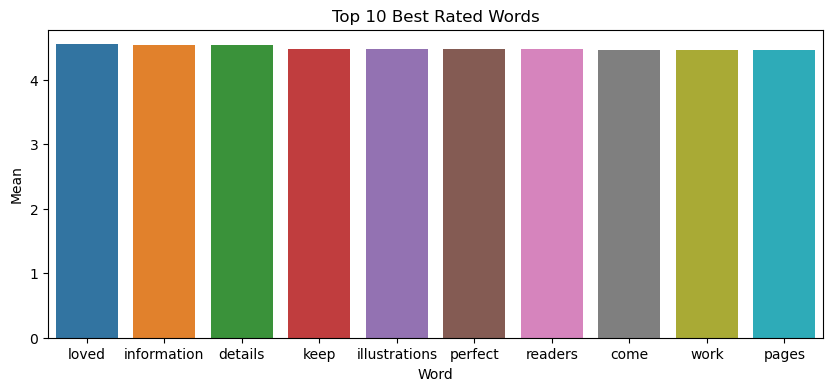

In [23]:
#Make Figure
plt.figure(figsize=(10,4))
dfWc = dfWords[dfWords['Count'] >= 50]

#Get Top 10 
dfCol = dfWc.sort_values(by = ['Mean'],ascending = False, inplace = False)
dfCol.reset_index(inplace = True, drop = True)
dfCol = dfCol.head(10)

#Make Plot
sns.barplot(x = 'Word', y = 'Mean', data = dfCol)
plt.title("Top 10 Best Rated Words")
plt.show()

<h1> Column Chart: Top 10 Most Negative Words </h1>

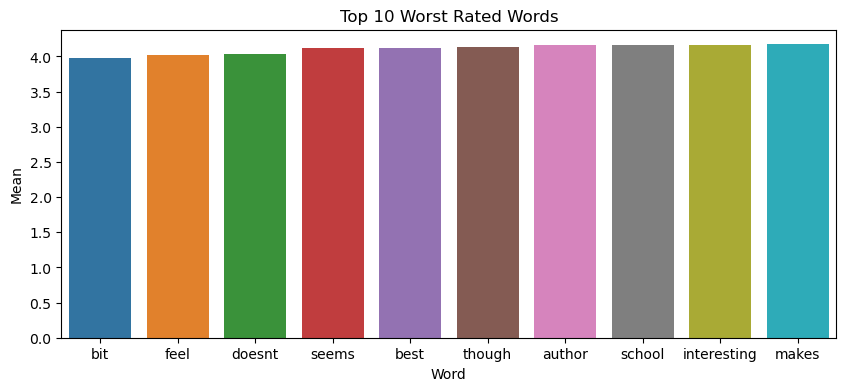

In [24]:
#Make Figure
plt.figure(figsize=(10,4))

#Get top 10
dfWc = dfWords[dfWords['Count'] >= 50]
dfCol = dfWc.sort_values(by = ['Mean'],ascending = True, inplace = False)
dfCol.reset_index(inplace = True, drop = True)
dfCol = dfCol.head(10)

#Plot Figure
sns.barplot(x = 'Word', y = 'Mean', data = dfCol)
plt.title("Top 10 Worst Rated Words")
plt.show()

<h1> Bar Chart: Top 10 Best Ranked Genres </h1>

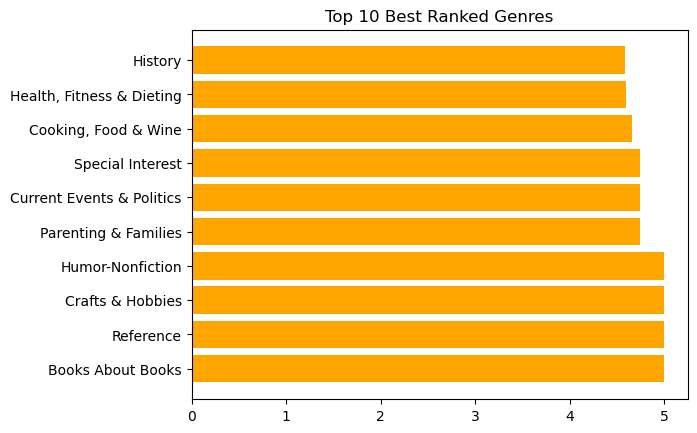

In [25]:
#Plot Top 10 Genres
dfGenre = dfData.groupby('Category')['Stars'].mean()
dfGenre.sort_values(ascending = False, inplace = True)
dfGenre = dfGenre.head(10)
plt.title("Top 10 Best Ranked Genres")
plt.barh(dfGenre.index, dfGenre.values, color = 'orange')
plt.show()

<h1> Bar Chart: Top 10 Worst Genres </h1>

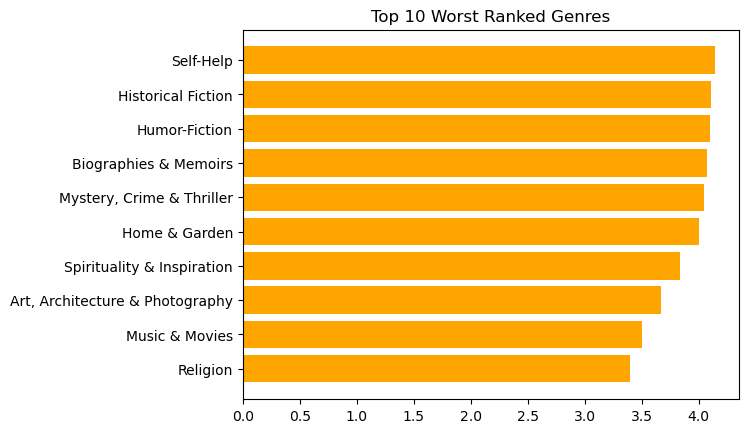

In [26]:
dfGenre = dfData.groupby('Category')['Stars'].mean()
dfGenre.sort_values(ascending = True, inplace = True)
dfGenre = dfGenre.head(10)
plt.title("Top 10 Worst Ranked Genres")
plt.barh(dfGenre.index, dfGenre.values, color = 'orange')
plt.show()

<h1> Bar Chart: Top 10 Best Ranked Publishers </h1>

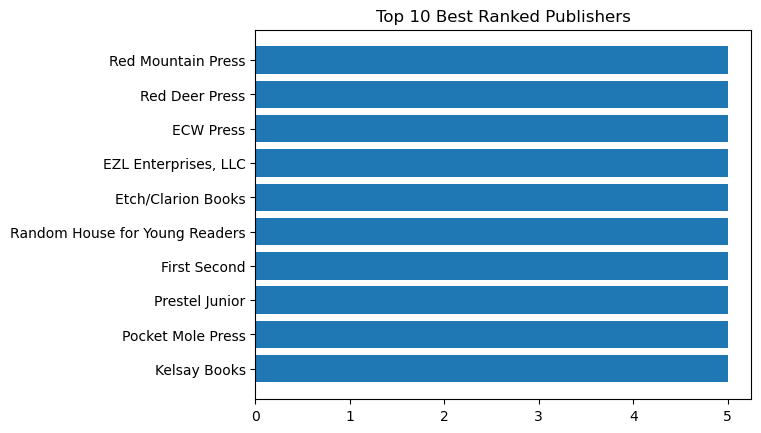

In [27]:
dfPub = dfData.groupby('Publisher')['Stars'].mean()
dfPub.sort_values(ascending = False, inplace = True)
dfPub = dfPub.head(10)
plt.title("Top 10 Best Ranked Publishers")
plt.barh(dfPub.index, dfPub.values)
plt.show()

<h1> Bar Chart: Top 10 Worst Ranked Publishers </h1>

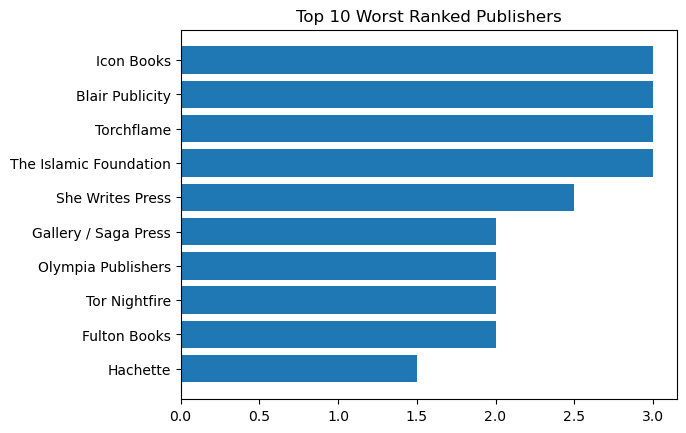

In [28]:
dfPub = dfData.groupby('Publisher')['Stars'].mean()
dfPub.sort_values(ascending = True, inplace = True)
dfPub = dfPub.head(12)
dfPub.drop('Yonder',inplace = True)
dfPub.drop('Houndstooth Books',inplace = True)
plt.title("Top 10 Worst Ranked Publishers")
plt.barh(dfPub.index, dfPub.values)
plt.show()